## steps to do eda project 
1. first read the dataset carefully and understand dataset
2. import all four libraries
3. we have to load the dataset
4. we have to look the column information using function "df.info()"
5. we to carefully the highest , lowest .and average values by using formula "df.describe()"
6. after that we have to check of our data set using "df.head()" and last values using "df.tail()"

In [1]:
import pandas as pd # for data manipulation
import numpy as py #for numerical analysis
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for statistical plots

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1.Banking transaction analysis (eda)
#### A complete exploratory data analysis (eda) project on a large scale banking dataset . the project will include 
1. a realistic dataset
2. step by step python code with explanations
3.  visualizatons and insights

#### Objective 
1.Analyze banking ,transactions from large dataset (1m+ records)
2.Identify trends, customer behavior and fraud patterns
3.perform exploratory data analysis(EDA) and visualize insights.

#### Dataset Used 
Massive bank dataset (1M+ rows)


#### Features include: 
1. transactionID: unique identifier for each transaction.
2. CustomerID: Unique identifier for each customer
3. transactionDate: timestamp for transaction.
4. transactionType: (Credit,Debit,transfer,etc)
5. Amount: Transaction Value.
6. Location: Where the transaction happend.
7. isFraud: 1 if fraud,0 if genuine.

In [3]:
df=pd.read_csv("banking_transactions_1M.csv")

In [4]:
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionType,Amount,Location,isFraud
0,1,4174,2023-07-29 08:48:28,Withdrawal,19614.53,Boston,0
1,2,4507,2023-11-07 20:56:56,Deposit,8161.18,Los Angeles,0
2,3,1860,2023-12-20 17:38:37,Debit,18338.93,Miami,0
3,4,2294,2023-06-11 09:46:58,Credit,40.20,Dallas,0
4,5,2130,2023-03-02 16:50:38,Withdrawal,19239.09,Los Angeles,0


## 3.initial data exploration
Q1. HOW MANY TRANSACTIONS ,COLUMNS ARE IN DATASET ?

In [5]:
df.shape

(1000000, 7)

Q2. What are the columns names and data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TransactionID    1000000 non-null  int64  
 1   CustomerID       1000000 non-null  int64  
 2   TransactionDate  1000000 non-null  object 
 3   TransactionType  1000000 non-null  object 
 4   Amount           1000000 non-null  float64
 5   Location         1000000 non-null  object 
 6   isFraud          1000000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 53.4+ MB


### 4. data cleaning

Q3. are there any missing values 

In [7]:
df.isnull().sum()

TransactionID      0
CustomerID         0
TransactionDate    0
TransactionType    0
Amount             0
Location           0
isFraud            0
dtype: int64

Q4.Convert transactionDate to datetime format?

## 5. Transaction type analysis
#### Q5. what are transaction type analysis

In [8]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  int64         
 1   CustomerID       1000000 non-null  int64         
 2   TransactionDate  1000000 non-null  datetime64[ns]
 3   TransactionType  1000000 non-null  object        
 4   Amount           1000000 non-null  float64       
 5   Location         1000000 non-null  object        
 6   isFraud          1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 53.4+ MB


In [10]:
df["TransactionType"].value_counts()

TransactionType
Debit         200447
Transfer      200209
Withdrawal    199898
Credit        199799
Deposit       199647
Name: count, dtype: int64

In [11]:
df["Amount"].value_counts()

Amount
19405.63    7
7823.82     7
15013.71    7
11094.10    6
7909.45     6
           ..
15227.31    1
17157.39    1
2244.56     1
13622.28    1
16198.05    1
Name: count, Length: 786884, dtype: int64

In [12]:
df["Location"].value_counts()

Location
Los Angeles      100748
Miami            100334
San Francisco    100272
Chicago          100020
New York          99983
Dallas            99942
Boston            99876
Las Vegas         99776
Houston           99550
Seattle           99499
Name: count, dtype: int64

In [13]:
df["TransactionID"].value_counts()

TransactionID
1          1
666658     1
666660     1
666661     1
666662     1
          ..
333338     1
333339     1
333340     1
333341     1
1000000    1
Name: count, Length: 1000000, dtype: int64

In [14]:
df["TransactionDate"].value_counts()

TransactionDate
2024-11-02 10:40:09    3
2024-04-19 03:20:25    3
2024-11-14 23:40:12    3
2023-03-26 16:54:18    3
2023-10-02 15:00:24    3
                      ..
2023-02-11 20:16:25    1
2023-09-01 16:57:46    1
2024-05-03 07:04:41    1
2024-12-13 23:23:43    1
2023-07-08 10:03:09    1
Name: count, Length: 992063, dtype: int64

### Q7. most common transaction type

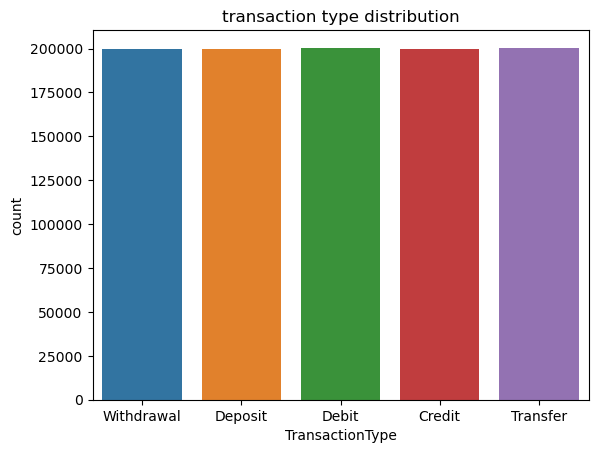

In [15]:
sns.countplot(data=df,x="TransactionType")
plt.title("transaction type distribution")
plt.show()

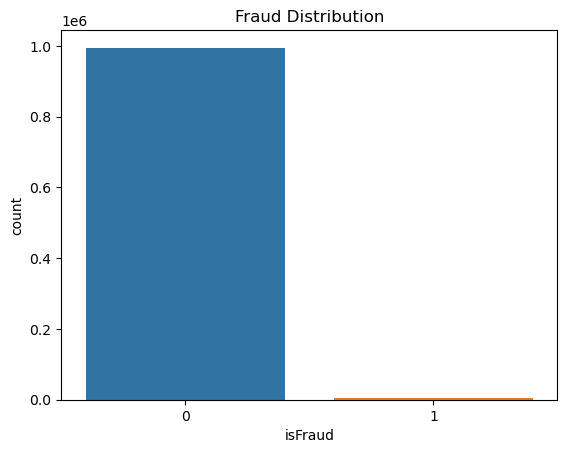

In [16]:
sns.countplot(data=df, x="isFraud")
plt.title("Fraud Distribution")
plt.show()

### Q7. what is average transaction amount

In [17]:
df.info()
df["Amount"].mean() # mean to access average

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  int64         
 1   CustomerID       1000000 non-null  int64         
 2   TransactionDate  1000000 non-null  datetime64[ns]
 3   TransactionType  1000000 non-null  object        
 4   Amount           1000000 non-null  float64       
 5   Location         1000000 non-null  object        
 6   isFraud          1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 53.4+ MB


9997.653584529995

#### the average transaction amount is 9997.653584529995

In [18]:
df.info()
df["Amount"].median() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  int64         
 1   CustomerID       1000000 non-null  int64         
 2   TransactionDate  1000000 non-null  datetime64[ns]
 3   TransactionType  1000000 non-null  object        
 4   Amount           1000000 non-null  float64       
 5   Location         1000000 non-null  object        
 6   isFraud          1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 53.4+ MB


9992.689999999999

## the median is 9992.689999999999

In [19]:
df.info()
df["Amount"].mode() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  int64         
 1   CustomerID       1000000 non-null  int64         
 2   TransactionDate  1000000 non-null  datetime64[ns]
 3   TransactionType  1000000 non-null  object        
 4   Amount           1000000 non-null  float64       
 5   Location         1000000 non-null  object        
 6   isFraud          1000000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 53.4+ MB


0     7823.82
1    15013.71
2    19405.63
Name: Amount, dtype: float64

## the mode is  7823.82

### Q8. what is the distribution of transaction amount

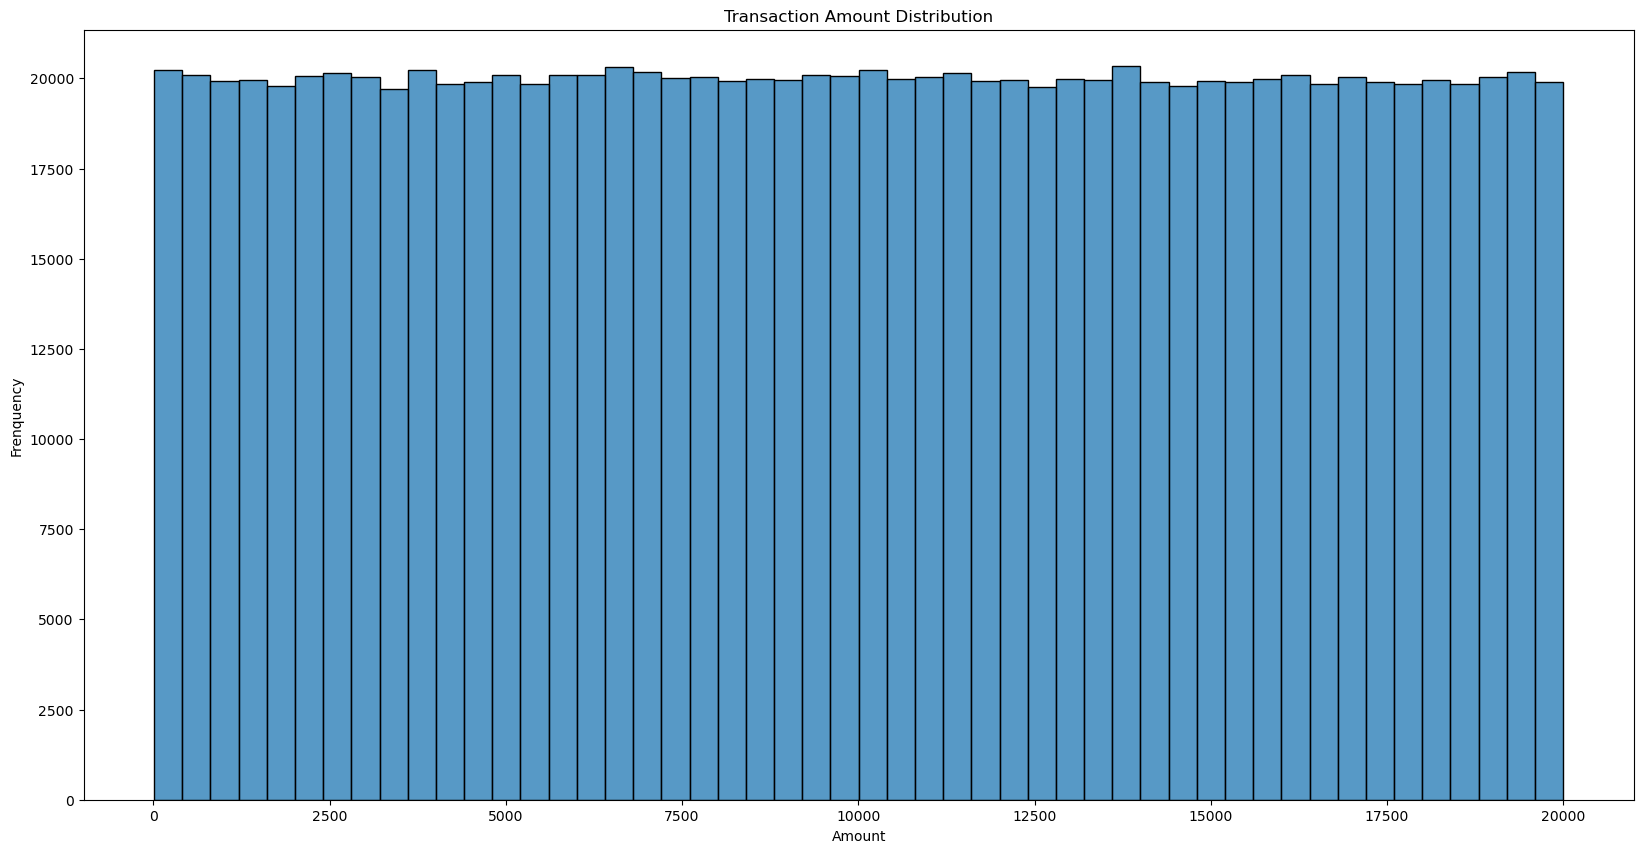

In [20]:
plt.figure(figsize=(20,10))
#plt.figure(figsize=(10, 5)): This line creates a new figure (a blank canvas) for plotting.
#The figsize argument specifies the size of the figure in inches. 
#Here, the width is 10 inches and the height is 5 inches.
#This ensures the plot will be large and easy to view.
sns.histplot(df["Amount"], bins=50 )
"""sns.histplot(...): This is a function from Seaborn (a visualization library built on top of Matplotlib) to create a histogram plot. The histogram shows the distribution of data, i.e., how data is spread out.
df["Amount"]: This refers to a specific column in your DataFrame df, specifically the "Amount" column. It represents the transaction amounts in the dataset.
bins=50: This defines how many bins (intervals) to use for the histogram. In this case, the data will be divided into 50 intervals to show the distribution.
kde=True: This adds a Kernel Density Estimation (KDE) curve to the histogram. The KDE curve is a smooth line that estimates the probability density function of the data. It helps visualize the underlying distribution of the data in addition to the histogram."""
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frenquency")
plt.show()


In [21]:
df.describe()

,TransactionID,CustomerID,TransactionDate,Amount,isFraud
count,1000000.000000,1000000.000000,1000000,1000000.000000,1000000.000000
mean,500000.500000,2999.146814,2024-02-05 03:33:35.710377216,9997.653585,0.005065
min,1.000000,1000.000000,2023-02-04 19:34:00,10.010000,0.000000
25%,250000.750000,2000.000000,2023-08-06 11:00:22.500000,5009.797500,0.000000
50%,500000.500000,2998.000000,2024-02-04 23:41:56,9992.690000,0.000000
75%,750000.250000,3999.000000,2024-08-05 21:13:23.249999872,14991.605000,0.000000
max,1000000.000000,4999.000000,2025-02-04 07:02:15,19999.990000,1.000000
std,288675.278933,1154.309681,NaN,5768.751350,0.070988


### 7 customer behaviour analysis
Q9. how many unique customer are there 

In [22]:
df["CustomerID"].nunique() # no.of unique values

4000

In [23]:
df["Location"].nunique()

10

Q10. which customer have the highest total transactions

In [24]:
df.groupby("CustomerID")["Amount"].sum().sort_values(ascending = False).head(12)
"""df.groupby("CustomerID"):

groupby("CustomerID"): This groups the data in the DataFrame df by the "CustomerID" column. This means the rows in the DataFrame are grouped based on unique customer IDs. After grouping, you can perform operations on each group (in this case, customer) individually.
["Amount"].sum():

["Amount"]: After grouping by "CustomerID", we are focusing on the "Amount" column, which presumably contains the transaction amounts.
.sum(): This aggregates (sums up) the "Amount" values for each customer. It calculates the total spending per customer by summing up all the transaction amounts for each customer ID.
.sort_values(ascending=False):

.sort_values(ascending=False): This sorts the resulting sums of transaction amounts in descending order, so the customers who have spent the most are listed first. By default, ascending=False sorts in descending order (highest to lowest).
.head(10):

.head(10): After sorting, this function selects the first 10 rows of the result. These will be the top 10 customers who have spent the most, according to the "Amount" column."""

'df.groupby("CustomerID"):\n\ngroupby("CustomerID"): This groups the data in the DataFrame df by the "CustomerID" column. This means the rows in the DataFrame are grouped based on unique customer IDs. After grouping, you can perform operations on each group (in this case, customer) individually.\n["Amount"].sum():\n\n["Amount"]: After grouping by "CustomerID", we are focusing on the "Amount" column, which presumably contains the transaction amounts.\n.sum(): This aggregates (sums up) the "Amount" values for each customer. It calculates the total spending per customer by summing up all the transaction amounts for each customer ID.\n.sort_values(ascending=False):\n\n.sort_values(ascending=False): This sorts the resulting sums of transaction amounts in descending order, so the customers who have spent the most are listed first. By default, ascending=False sorts in descending order (highest to lowest).\n.head(10):\n\n.head(10): After sorting, this function selects the first 10 rows of the 

In [25]:
df.groupby("CustomerID")["Amount"].sum().sort_values(ascending = True).tail(12)

CustomerID
3196    3018276.61
1107    3021540.78
3050    3023650.82
4968    3025126.69
1213    3028768.06
1620    3032669.06
2255    3034886.44
3529    3064485.59
1161    3134676.23
1386    3161132.70
3617    3173066.73
3225    3173403.37
Name: Amount, dtype: float64

## task

In [26]:
df.groupby("TransactionID")["Amount"].sum().sort_values(ascending = False ).head(30)

TransactionID
258781    19999.99
818886    19999.96
914731    19999.92
982417    19999.92
609348    19999.91
184247    19999.90
597609    19999.89
330748    19999.83
393513    19999.83
765005    19999.82
940303    19999.82
137510    19999.81
132266    19999.76
192941    19999.73
597209    19999.71
914288    19999.71
257769    19999.70
574808    19999.67
181041    19999.65
914770    19999.65
987555    19999.64
259314    19999.59
876799    19999.58
693896    19999.56
600712    19999.55
465428    19999.52
285863    19999.52
462461    19999.51
541249    19999.50
623530    19999.48
Name: Amount, dtype: float64

Q. which city has highest amount of transactions

In [27]:
df.groupby("Location")["Amount"].sum().sort_values(ascending = False ).head()

Location
Los Angeles      1.007472e+09
San Francisco    1.003159e+09
Miami            1.002906e+09
New York         1.001464e+09
Dallas           9.994833e+08
Name: Amount, dtype: float64

In [28]:
df["Location"].value_counts().head(5)

Location
Los Angeles      100748
Miami            100334
San Francisco    100272
Chicago          100020
New York          99983
Name: count, dtype: int64

In [29]:
df["Amount"].value_counts().head(5)

Amount
19405.63    7
7823.82     7
15013.71    7
11094.10    6
7909.45     6
Name: count, dtype: int64

In [30]:
df["CustomerID"].value_counts().head(5)

CustomerID
4444    313
2013    305
1386    304
1213    301
2753    300
Name: count, dtype: int64

"""The code df["Location"].value_counts().head(5) is used to find the top 5 most frequent locations in the "Location" column of your DataFrame df. Let's break it down:
Line-by-line explanation:
df["Location"]: This accesses the "Location" column in your DataFrame df. The "Location" column likely contains information about where the transaction took place, or the location of customers, etc.

value_counts(): This function counts the number of occurrences of each unique value in the "Location" column. It returns a Series where the index is the unique locations, and the values are the count of how many times each location appears in the column. This allows you to see which locations are the most common.

head(5): After counting the occurrences of each location, this function selects the first 5 rows. Since the value_counts() function sorts the results by frequency (from highest to lowest), the first 5 will be the top 5 most frequent locations."""

### 9. fraud detection analysis 

Q12. how many fraudlent transaction are there ?

In [31]:
df["isFraud"].value_counts()
# the total fraudlent transactions are 5065

isFraud
0    994935
1      5065
Name: count, dtype: int64

"""df["isFraud"]:

df["isFraud"]: This accesses the "isFraud" column in your DataFrame df. The "isFraud" column likely contains information indicating whether a transaction is fraudulent or not, where the values might be something like 1 for fraudulent transactions and 0 for non-fraudulent transactions.
value_counts():

value_counts(): This function counts how many times each unique value appears in the "isFraud" column. It will return a Series where the index is the unique values in "isFraud" (likely 0 and 1), and the values represent the count of occurrences for each value. This will help you understand the distribution of fraud and non-fraudulent transactions in the dataset."""

Q13. what is the total fraud amount?

In [32]:
df[df["isFraud"]== 1]["Amount"].sum()

51577506.41

"""The code df[df["isFraud"] == 1]["Amount"].sum() is used to calculate the total transaction amount for fraudulent transactions in the "isFraud" column of your DataFrame df. Let's break down each part of this code:

Line-by-line explanation:
df[df["isFraud"] == 1]: Single equals (=): This is used for assignment. It assigns a value to a variable, like x = 5.

Double equals (==): This is used for comparison. It checks if two values are equal. In this case, it's checking whether each value in the isFraud column is equal to 1.

df["isFraud"] == 1: This creates a boolean condition that checks whether the value in the "isFraud" column is 1 (which we assume represents fraudulent transactions).
df[...]: This filters the DataFrame df to include only the rows where the condition df["isFraud"] == 1 is True. In other words, it selects only the rows where the transaction is fraudulent."""

Q.14 what is the fraud rate per transaction type ?

In [33]:
df.groupby("TransactionType")["isFraud"].mean()*100

TransactionType
Credit        0.482485
Debit         0.495892
Deposit       0.514408
Transfer      0.523952
Withdrawal    0.515763
Name: isFraud, dtype: float64

In [34]:
df.groupby("Location")["isFraud"].mean()*100

Location
Boston           0.520646
Chicago          0.458908
Dallas           0.508295
Houston          0.509292
Las Vegas        0.524174
Los Angeles      0.478421
Miami            0.524249
New York         0.493084
San Francisco    0.514600
Seattle          0.533674
Name: isFraud, dtype: float64

Q15. do fraudlent transactions have higher amounts?

<Axes: xlabel='isFraud', ylabel='Amount'>

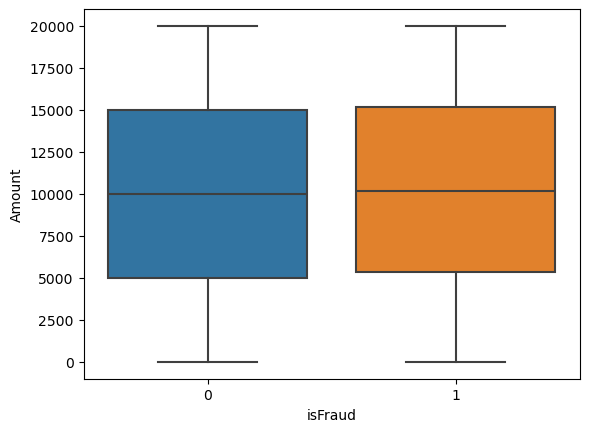

In [35]:
sns.boxplot(data = df , x="isFraud", y= "Amount")

<Axes: xlabel='Amount', ylabel='Location'>

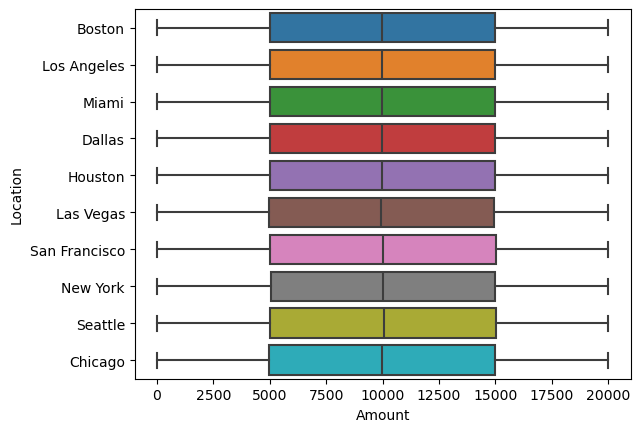

In [36]:
sns.boxplot(data = df , x = "Amount",y = "Location")

""" The code sns.boxplot(data=df, x="isFraud", y="Amount") creates a boxplot using Seaborn to visualize the distribution of transaction amounts for fraudulent and non-fraudulent transactions. Let's break it down:

Line-by-line explanation:
sns.boxplot(...):

sns.boxplot(...): This is a function from the Seaborn library that creates a boxplot, which is a useful way to display the distribution of a numerical variable and identify outliers. A boxplot shows the median, quartiles, and possible outliers of the data, making it easy to compare distributions between categories.
data=df:

data=df: This specifies the DataFrame df that contains the data. The data argument tells Seaborn where to look for the data.
x="isFraud":

x="isFraud": This sets the variable on the x-axis to "isFraud." The "isFraud" column typically contains binary values, such as 1 for fraudulent transactions and 0 for non-fraudulent transactions. The boxplot will create two categories on the x-axis: one for fraudulent transactions and one for non-fraudulent transactions.
y="Amount":

y="Amount": This sets the variable on the y-axis to "Amount," which represents the transaction amount. This shows how the transaction amounts are distributed for each category of fraud (fraudulent and non-fraudulent). """

#### 10. Time- based analysis
Q16. what are the peak transactions hours

<Axes: xlabel='Hour', ylabel='count'>

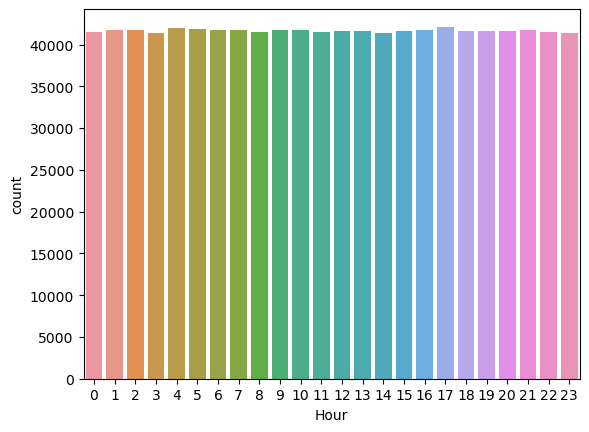

In [37]:
df["Hour"] = df["TransactionDate"].dt.hour
sns.countplot(x="Hour",data = df)

the peak transaction time is 17hrs .. 5pm 

## task 

<Axes: xlabel='year', ylabel='count'>

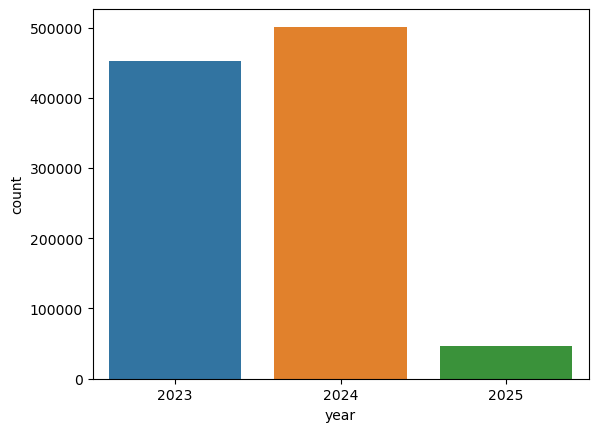

In [38]:
df["year"]= df["TransactionDate"].dt.year
sns.countplot(x="year",data = df)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   TransactionID    1000000 non-null  int64         
 1   CustomerID       1000000 non-null  int64         
 2   TransactionDate  1000000 non-null  datetime64[ns]
 3   TransactionType  1000000 non-null  object        
 4   Amount           1000000 non-null  float64       
 5   Location         1000000 non-null  object        
 6   isFraud          1000000 non-null  int64         
 7   Hour             1000000 non-null  int32         
 8   year             1000000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(2)
memory usage: 61.0+ MB


<Axes: xlabel='TransactionDate'>

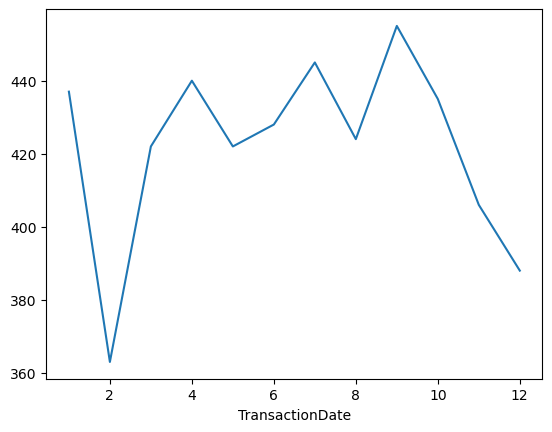

In [40]:
df.groupby(df["TransactionDate"].dt.month)["isFraud"].sum().plot()

fraud spikes in september 

## task 

<Axes: xlabel='TransactionDate'>

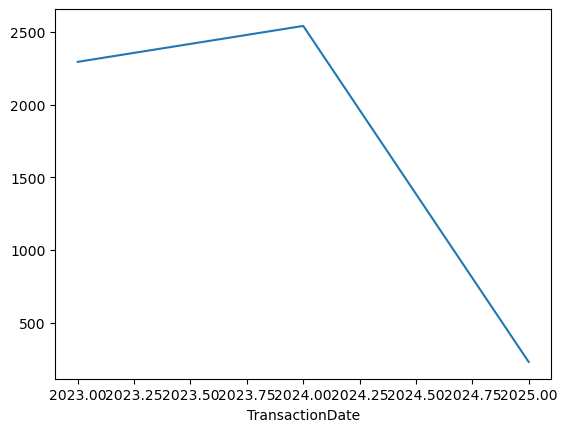

In [41]:
df.groupby(df["TransactionDate"].dt.year)["isFraud"].sum().plot()

"""1. df["TransactionDate"].dt.month:
df["TransactionDate"]: This refers to the "TransactionDate" column in your DataFrame, which likely contains datetime values.
.dt.month: This extracts the month from the "TransactionDate" column. It returns an integer representing the month of each transaction, ranging from 1 (January) to 12 (December).
2. df.groupby(df["TransactionDate"].dt.month):
groupby(df["TransactionDate"].dt.month): This groups the data by the month of the transaction. All transactions that happened in the same month will be grouped together. So, you’ll have 12 groups (one for each month), each representing the transactions for that specific month.
3. ["isFraud"]:
["isFraud"]: After grouping the data by month, we focus on the "isFraud" column, which likely contains 1 for fraudulent transactions and 0 for non-fraudulent ones.
4. .sum():
.sum(): This sums the values of the "isFraud" column for each month. Since 1 represents fraudulent transactions, the sum gives the total number of fraudulent transactions for each month. For example, if a month has 3 fraudulent transactions, the sum for that month will be 3.
5. .plot():
.plot(): This generates a plot (typically a line plot) to visualize the data. In this case, it will create a line plot showing the total number of fraudulent transactions for each month. The x-axis represents the months (from 1 to 12), and the y-axis represents the number of fraudulent transactions for each month."""

  Q18. what is the distribution of transaction by day of the week 

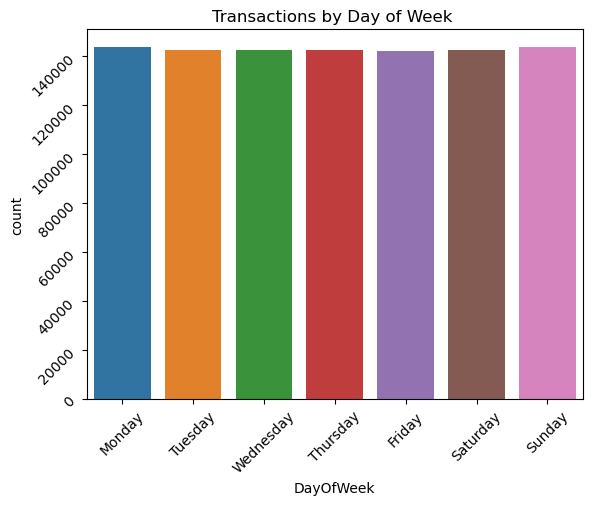

In [42]:
df["DayOfWeek"]= df["TransactionDate"].dt.day_name()
sns.countplot(data = df, x="DayOfWeek",order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xticks(rotation = 45) # used to rotate x axis label
plt.yticks(rotation = 45)#task
plt.title("Transactions by Day of Week ")
plt.show()

Q19. what is the average transaction amount by day of week 

In [51]:
df.groupby("DayOfWeek") ["Amount"].mean().sort_values (ascending = False)

DayOfWeek
Tuesday      10009.254183
Wednesday    10006.736955
Sunday       10006.171637
Thursday      9993.955690
Monday        9992.994624
Friday        9991.231210
Saturday      9983.204762
Name: Amount, dtype: float64

answer= tuesday transactions have the highest average (10009.254183). Saturday have the lowest average (9983.204762)
# this helps plan bank server loads and detect unsual spending

Q20. how do fraudlent transaction differ from non-fraudlent ones in terms of locations?

In [56]:
df.groupby(["Location","isFraud"])["TransactionID"].count().unstack().fillna(0)

isFraud,0,1
Location,,
Boston,99356,520
Chicago,99561,459
Dallas,99434,508
Houston,99043,507
Las Vegas,99253,523
Los Angeles,100266,482
Miami,99808,526
New York,99490,493
San Francisco,99756,516
